## Estudio del Comportamiento del Tráfico de Datos en la Red: Distinguiendo entre el Tráfico Normal del Malicioso.
_______________________________________________________________________________

### Tema del EDA

#### El objetivo del proyecto consiste en analizar el comportamiento del tráfico de datos en la red, es decir, diferenciar patrones en el tráfico etiquetado como ataque frente al tráfico benigno.

### La hipótesis principal del proyecto trata de lo siguiente:

##### **Hipótesis principal:** Saber si el tráfico de red etiquetado como ataque presenta patrones y características significativamente distintas al tráfico benigno, lo que permite su identificación mediante el análisis de variables clave.

##### Como dataset a analizar, se ha elegido el siguiente: "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX" descargado de "Kaggle".
> Instituto Canadiense de Ciberseguridad (2017). CICIDS 2017: Sistema de detección de intrusiones del Instituto Canadiense de Ciberseguridad 2017 [Conjunto de datos]. https://www.unb.ca/cic/datasets/ids-2017.html

_______________________________________________________________________________________________________________________________________________________

## Código del EDA

Se procederá a importar las librerías necesarias para el desarrollo del EDA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Importaremos la información del dataset en un DataFrame de pandas. Esta información se encuentra en un archivo .csv.

In [2]:
# Cargamos el dataset
friday = pd.read_csv('./Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', skipinitialspace=True)
friday

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
# Limpiamos los nombres de las columnas eliminando espacios extras
friday.columns = friday.columns.str.strip()
friday.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
friday.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225745 non-null  int64  
 1   Flow Duration                225745 non-null  int64  
 2   Total Fwd Packets            225745 non-null  int64  
 3   Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets  225745 non-null  int64  
 5   Total Length of Bwd Packets  225745 non-null  int64  
 6   Fwd Packet Length Max        225745 non-null  int64  
 7   Fwd Packet Length Min        225745 non-null  int64  
 8   Fwd Packet Length Mean       225745 non-null  float64
 9   Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max        225745 non-null  int64  
 11  Bwd Packet Length Min        225745 non-null  int64  
 12  Bwd Packet Length Mean       225745 non-null  float64
 13 

Eliminamos los valores infinitos y los NaN

In [5]:
friday_limpio = friday.replace([np.inf, -np.inf], np.nan).dropna()
friday_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225711 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             225711 non-null  int64  
 1   Flow Duration                225711 non-null  int64  
 2   Total Fwd Packets            225711 non-null  int64  
 3   Total Backward Packets       225711 non-null  int64  
 4   Total Length of Fwd Packets  225711 non-null  int64  
 5   Total Length of Bwd Packets  225711 non-null  int64  
 6   Fwd Packet Length Max        225711 non-null  int64  
 7   Fwd Packet Length Min        225711 non-null  int64  
 8   Fwd Packet Length Mean       225711 non-null  float64
 9   Fwd Packet Length Std        225711 non-null  float64
 10  Bwd Packet Length Max        225711 non-null  int64  
 11  Bwd Packet Length Min        225711 non-null  int64  
 12  Bwd Packet Length Mean       225711 non-null  float64
 13  Bwd 

De momento llegamos a la conclusión de que, como se puede observar:
- La mayoría de las columnas son de tipo int64 y float64. 
- Nuestro target es la columna "Label", que nos indica si el tráfico es benigno o DDoS. 
- El dataset recoge 79 columnas de características del tráfico de red con 225711 entradas, con datos NaN e inf limpiados.


## Resolviendo la hipótesis principal de nuestro EDA:

### *"Saber si el tráfico de red etiquetado como ataque presenta patrones y características significativamente distintas al tráfico benigno, lo que permite su identificación mediante el análisis de variables clave."*


##### Vamos a comenzar con nuestro estudio:

#### PASO 1: EXPLORACIÓN INICIAL DE LOS DATOS


**Objetivo:** Entender lo que se refiere a la distribución básica de nuestros datos y a la proporción del tráfico normal vs anómalo.

Se ha de aclarar previamente que, nuestro dataset está completamente cargado y limpio. Lo cual lo hace estar completamente listo para comenzar con nuestro estudio.

**1.1 Mostraremos la información básica del dataset**

In [6]:
print("\nDimensiones del dataset:", friday_limpio.shape)
print("\nColumnas en el dataset:")
print(friday_limpio.columns.tolist())


Dimensiones del dataset: (225711, 79)

Columnas en el dataset:
['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK 

**1.2 Creamos una variable binaria para el tráfico normal vs el anómalo**

In [7]:
friday_limpio['es_ataque'] = (friday_limpio['Label'] != 'BENIGN').astype(int)

**1.3 Mostramos la distribución del tráfico normal vs el del anómalo**

In [8]:
print("\nDistribución de tráfico:")
print(friday_limpio['es_ataque'].value_counts(normalize=True).round(3) * 100, "% del total") #En binario (1 --> Ataque, 0 --> Tráfico normal)


Distribución de tráfico:
es_ataque
1    56.7
0    43.3
Name: proportion, dtype: float64 % del total


Esto quiere decir que, el 56.7% del total de datos, son ataques DDoS, mientras que el 43.3% restante, son tráfico normal.

Para verlo mejor, con un gráfico tipo pastel:

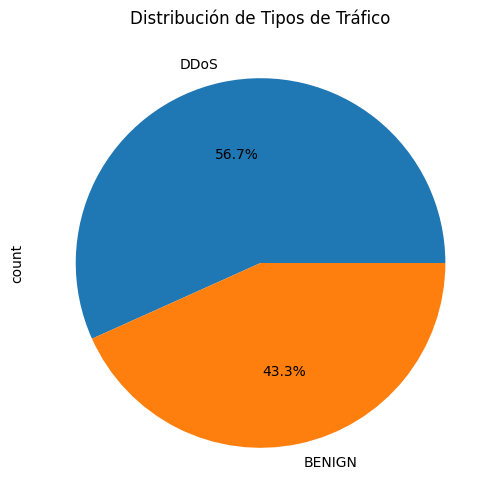

In [9]:
# Creamos un gráfico de pastel para visualizar la distribución
plt.figure(figsize=(10, 6))
friday_limpio['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Tipos de Tráfico')
plt.show()

**1.4 Visualizamos la distribución de los tipos de ataque**



In [10]:
print("Distribución de tipos de tráfico:")
display(friday_limpio['Label'].value_counts())

Distribución de tipos de tráfico:


Label
DDoS      128025
BENIGN     97686
Name: count, dtype: int64

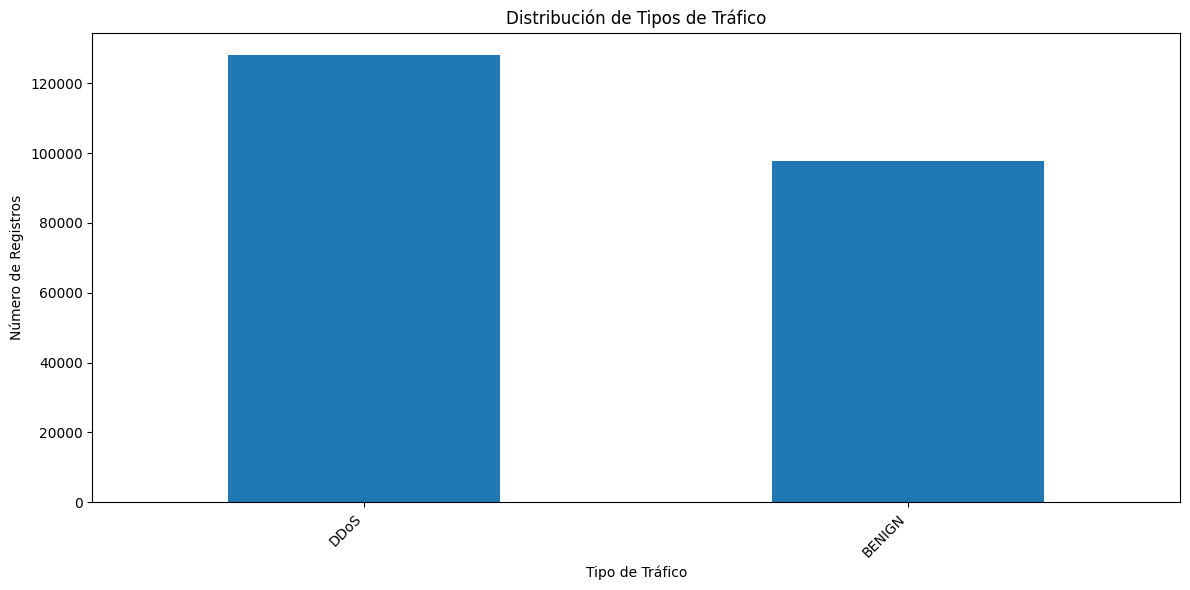

In [11]:
plt.figure(figsize=(12, 6))
friday_limpio['Label'].value_counts().plot(kind='bar')
plt.title('Distribución de Tipos de Tráfico')
plt.xlabel('Tipo de Tráfico')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### PASO 2: ANÁLISIS DE LAS CARACTERÍSTICAS PRINCIPALES

**Objetivo:** Identificar las diferencias en las características principales entre el tráfico normal y el anómalo.


Para ello:

**2.1 Seleccionamos las características principales para el análisis**



Estas características son:


In [12]:
caracteristicas_principales = [
    'Flow Duration',
    'Flow Packets/s',
    'Flow Bytes/s',
    'Total Fwd Packets',
    'Total Backward Packets'
]

**2.2 Vamos a analizar las estadísticas descriptivas por cada tipo de tráfico**




In [13]:
print("\nEstadísticas descriptivas para tráfico normal:")
friday_limpio[friday_limpio['es_ataque'] == 0][caracteristicas_principales].describe()


Estadísticas descriptivas para tráfico normal:


,Flow Duration,Flow Packets/s,Flow Bytes/s,Total Fwd Packets,Total Backward Packets
count,9.768600e+04,9.768600e+04,9.768600e+04,97686.000000,97686.000000
mean,1.531128e+07,3.267894e+04,1.272498e+06,5.403415,6.300197
std,3.216281e+07,1.728687e+05,2.559542e+07,23.334014,32.862477
min,-1.000000e+00,-2.000000e+06,-1.200000e+07,1.000000,0.000000
25%,3.140000e+02,9.879198e-01,6.548791e+01,1.000000,1.000000
50%,1.722090e+05,2.746272e+01,2.220036e+03,2.000000,2.000000
75%,7.522024e+06,1.002506e+04,1.153846e+05,5.000000,6.000000
max,1.199999e+08,3.000000e+06,2.070000e+09,1932.000000,2942.000000


In [14]:
print("\nEstadísticas descriptivas para tráfico anómalo:")
friday_limpio[friday_limpio['es_ataque'] == 1][caracteristicas_principales].describe()


Estadísticas descriptivas para tráfico anómalo:


,Flow Duration,Flow Packets/s,Flow Bytes/s,Total Fwd Packets,Total Backward Packets
count,1.280250e+05,1.280250e+05,1.280250e+05,128025.000000,128025.000000
mean,1.695586e+07,1.727886e+02,6.111788e+04,4.472494,3.255856
std,3.101278e+07,9.961510e+03,1.471895e+06,1.897772,2.554296
min,1.000000e+00,3.686968e-02,2.212181e-01,1.000000,0.000000
25%,6.132980e+05,4.953557e-01,7.046449e+00,3.000000,0.000000
50%,1.878984e+06,2.589675e+00,1.601013e+02,4.000000,4.000000
75%,9.387683e+06,1.302549e+01,1.699332e+04,5.000000,5.000000
max,1.039416e+08,2.000000e+06,3.470000e+08,11.000000,8.000000


**2.3 Visualizamos las distribuciones de las características principales**




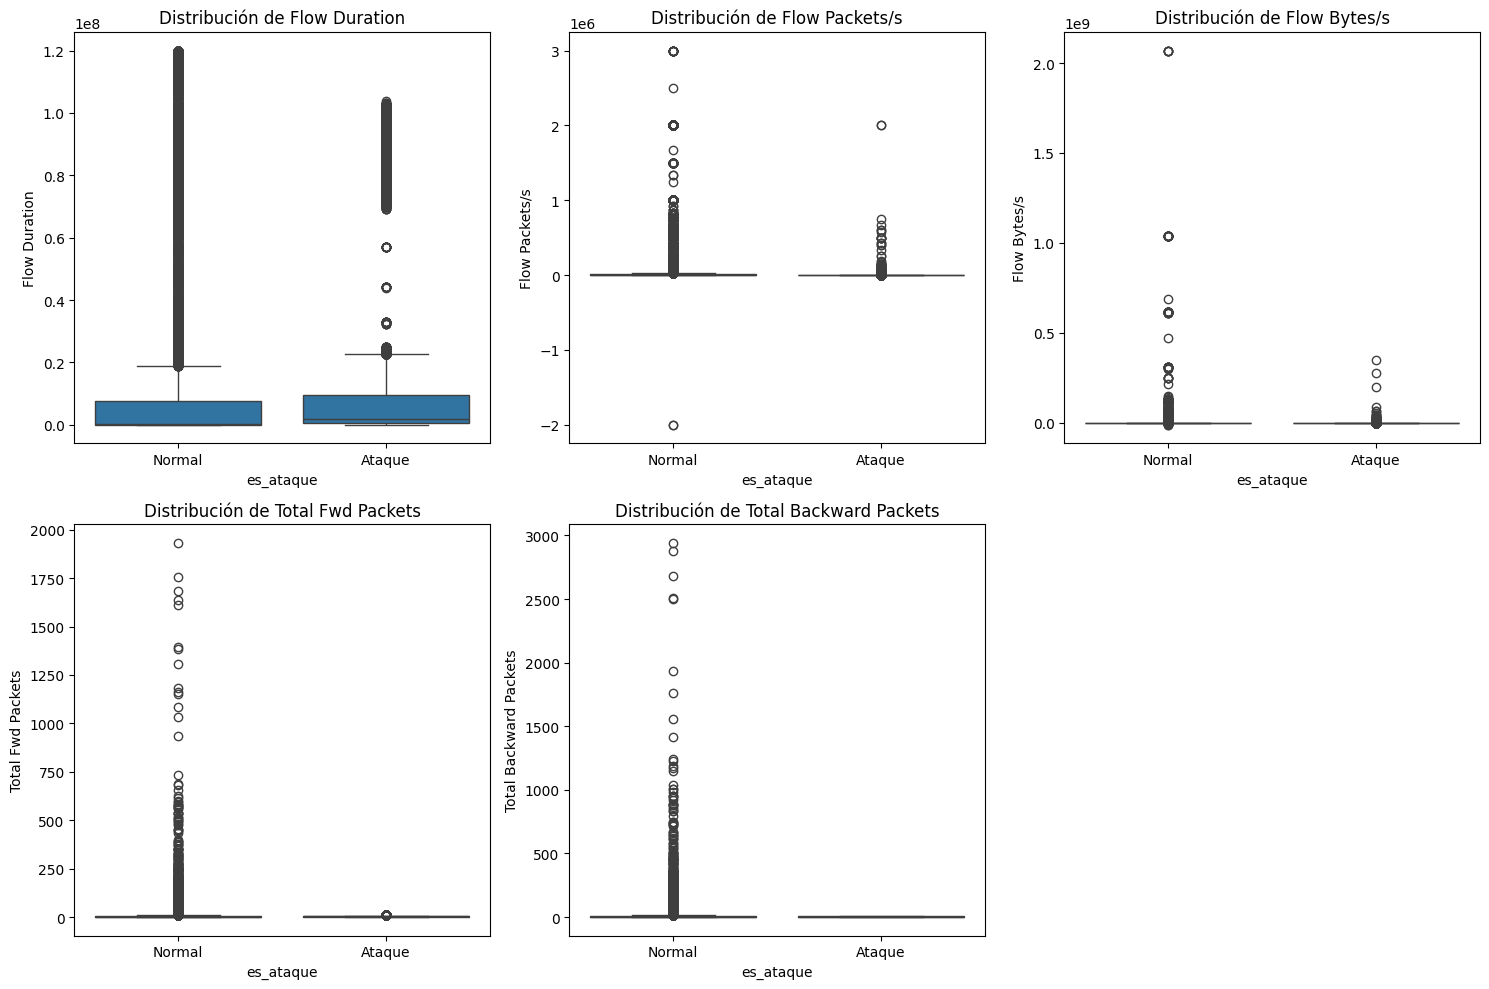

In [15]:
# Configuración de la figura
plt.figure(figsize=(15, 10))

# Crear boxplots para cada característica
for i, caracteristica in enumerate(caracteristicas_principales, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='es_ataque', y=caracteristica, data=friday_limpio)
    plt.title(f'Distribución de {caracteristica}')
    plt.xticks([0, 1], ['Normal', 'Ataque'])  # Etiquetas para el eje X
    plt.ylabel(caracteristica)  # Etiqueta del eje Y

plt.tight_layout()
plt.show()

Para que se llegara a visualizar mejor y ser más intuitivo, se ha llegado a realizar esto mismo mediante **histográmas**.

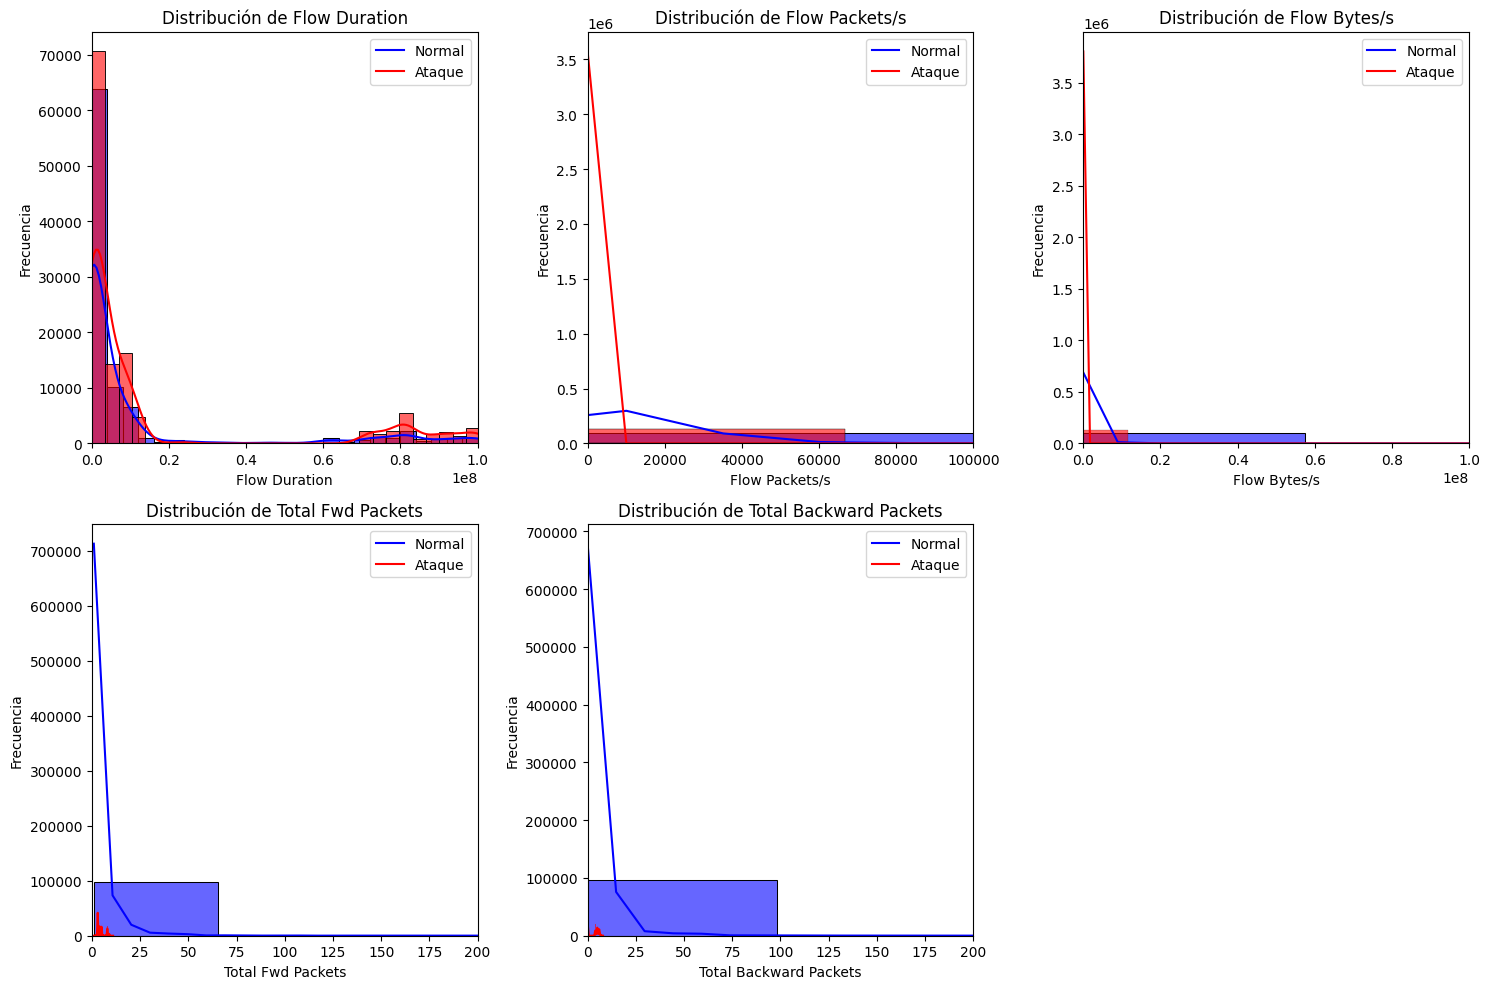

In [16]:
# Realizamos la configuración de la figura
plt.figure(figsize=(15, 10))

# Crear histogramas para cada característica
for i, caracteristica in enumerate(caracteristicas_principales, 1):
    plt.subplot(2, 3, i)
    
    # Histograma para tráfico normal
    sns.histplot(data=friday_limpio[friday_limpio['es_ataque'] == 0], 
                 x=caracteristica, 
                 color='blue', 
                 bins=30, 
                 alpha=0.6, 
                 label='Normal', 
                 kde=True)  # Añadimos la densidad de Kernel
    
    # Histograma para tráfico de ataque
    sns.histplot(data=friday_limpio[friday_limpio['es_ataque'] == 1], 
                 x=caracteristica, 
                 color='red', 
                 bins=30, 
                 alpha=0.6, 
                 label='Ataque', 
                 kde=True)  # Añadimos la densidad de Kernel
    
    plt.title(f'Distribución de {caracteristica}')
    plt.xlabel(caracteristica)  # Etiqueta del eje X
    plt.ylabel('Frecuencia')  # Etiqueta del eje Y
    plt.legend(['Normal', 'Ataque'])

    # Ajustamos los límites del eje X para ver más de cerca
    if caracteristica == 'Flow Duration':
        plt.xlim(0, 1e8)  # Ajustar según el rango de tus datos
    elif caracteristica == 'Flow Packets/s':
        plt.xlim(0, 1e5)  # Ajustar según el rango de tus datos
    elif caracteristica == 'Flow Bytes/s':
        plt.xlim(0, 1e8)  # Ajustar según el rango de tus datos
    elif caracteristica == 'Total Fwd Packets':
        plt.xlim(0, 200)  # Ajustar según el rango de tus datos
    elif caracteristica == 'Total Backward Packets':
        plt.xlim(0, 200)  # Ajustar según el rango de tus datos

plt.tight_layout()
plt.show()

Ambos tipos de gráficos, como se puede observar, son complementarios y pueden ser utilizados juntos para obtener una comprensión más completa de las distribuciones de las características en el conjunto de datos.

#### PASO 3: ANÁLISIS DE CORRELACIONES





**Objetivo:** Se trata de identificar las relaciones entre las variables y cómo difieren estas entre el tráfico normal y el anómalo.

**3.1 Seleccionamos las variables numéricas para el análisis**


In [17]:
variables_numericas = friday_limpio.select_dtypes(include=['float64', 'int64']).columns #tanto float64 como int64

**3.2 Calculamos y visualizamos las correlaciones para tráfico normal**





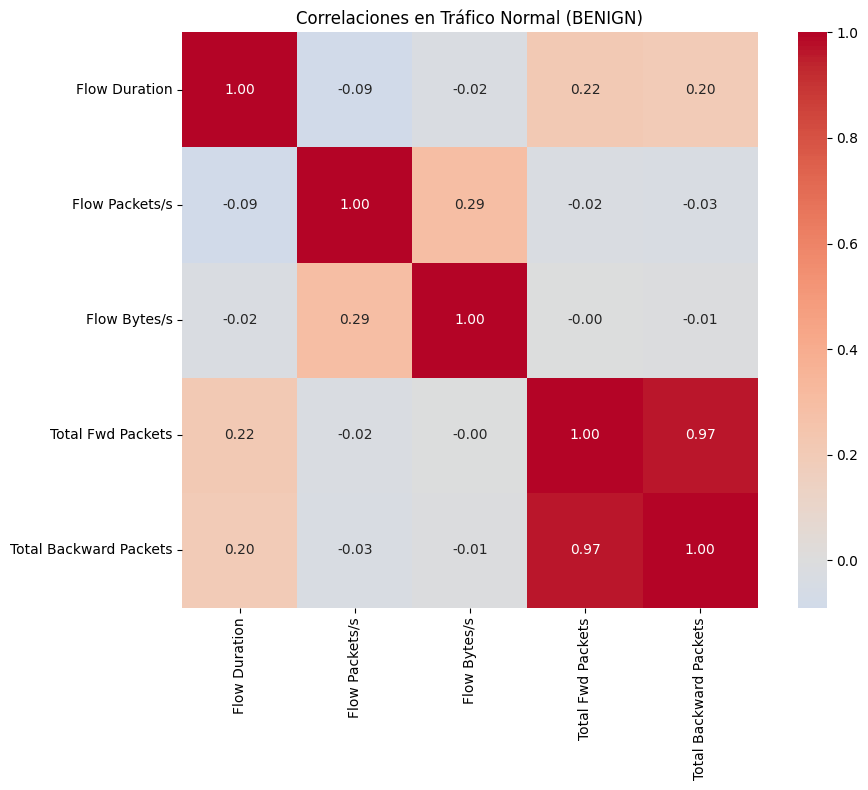

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(friday_limpio[friday_limpio['es_ataque'] == 0][caracteristicas_principales].corr(), 
            cmap='coolwarm', 
            center=0,
            annot=True,  # Muestra los valores numéricos
            fmt='.2f',   # Formato de 2 decimales
            square=True) # Hace las celdas cuadradas
plt.title('Correlaciones en Tráfico Normal (BENIGN)')
plt.tight_layout()
plt.show()

En el mapa de calor para el tráfico normal, se puede observar que:

- Tiene correlaciones fuertes positivas en las variables: "Flow Packets/s" y "Flow Bytes/s" esto nos dice y tendría sentido, ya que más paquetes por segundo implican más bytes por segundo.
- Tiene correlaciones moderadas en las variables: "Total Fwd Packets" y "Total Backward Packets" esto nos dice que, el número de paquetes enviados y recibidos, están relacionados, es decir, indica una comunicación bidireccional balanceada como si se tratase de un tráfico web normal.
- Tiene correlaciones débiles en las variables por ejemplo: "Flow Duration" con otras variables, esto podría decirnos que, la duración del flujo no está directamente relacionada con otras variables, sino que es más independiente.

Esto, nos muestra que el tráfico normal (BENIGN) muestra unas relaciones más naturales y balanceadas entre las variables además de que las correlaciones reflejan un comportamiento más natural y humano.


**3.3 Calcular y visualizar correlaciones para tráfico anómalo**

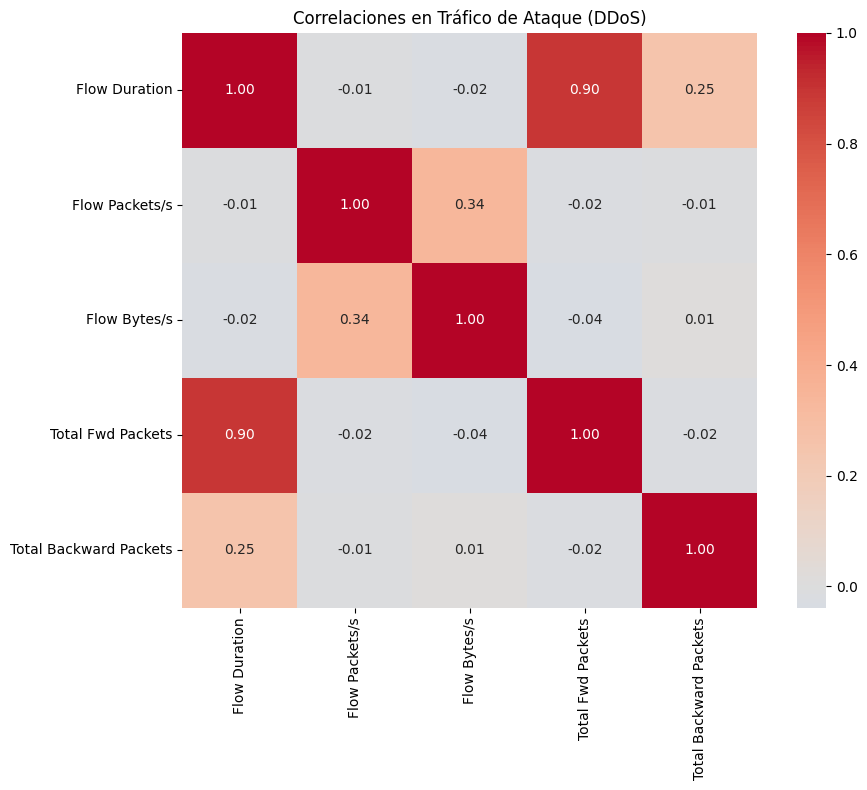

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(friday_limpio[friday_limpio['es_ataque'] == 1][caracteristicas_principales].corr(), 
            cmap='coolwarm', 
            center=0,
            annot=True,  # Muestra los valores numéricos
            fmt='.2f',   # Formato de 2 decimales
            square=True) # Hace las celdas cuadradas
plt.title('Correlaciones en Tráfico de Ataque (DDoS)')
plt.tight_layout()
plt.show()

En el mapa de calor para el tráfico anómalo, se puede observar que:

- Tiene correlaciones fuertes positivas en las variables: "Flow Packets/s" y "Flow Bytes/s" esto nos puede decir que, hay una relación casi perfecta entre los paquetes y bytes por segundo. Indica además, comportamiento automatizado/mecánico con un patrón muy regular.

- Tiene correlaciones fuertes negativas en las variables: "Flow Duration" con "Flow Packets/s" y "Flow Bytes/s". Esto nos dice que, a menor duración, mayor intensidad hay de tráfico. Es característico de ataques que buscan saturar los recursos del sistema objetivo (DDoS).

- Presenta además correlaciones débiles entre las variables: "Total Fwd Packets" y "Total Backward Packets", lo cual nos dice que, el número de paquetes enviados y recibidos, no están directamente relacionados, sino que son independientes. Lo cual hay menos balance entre tráfico entrante y saliente.



#### Para verlo más cláramente, podemos hacer para cada tipo de tráfico, la correlación entre las variables "Total Fwd Packets" y "Total Backward Packets", mediante Scatter plots.

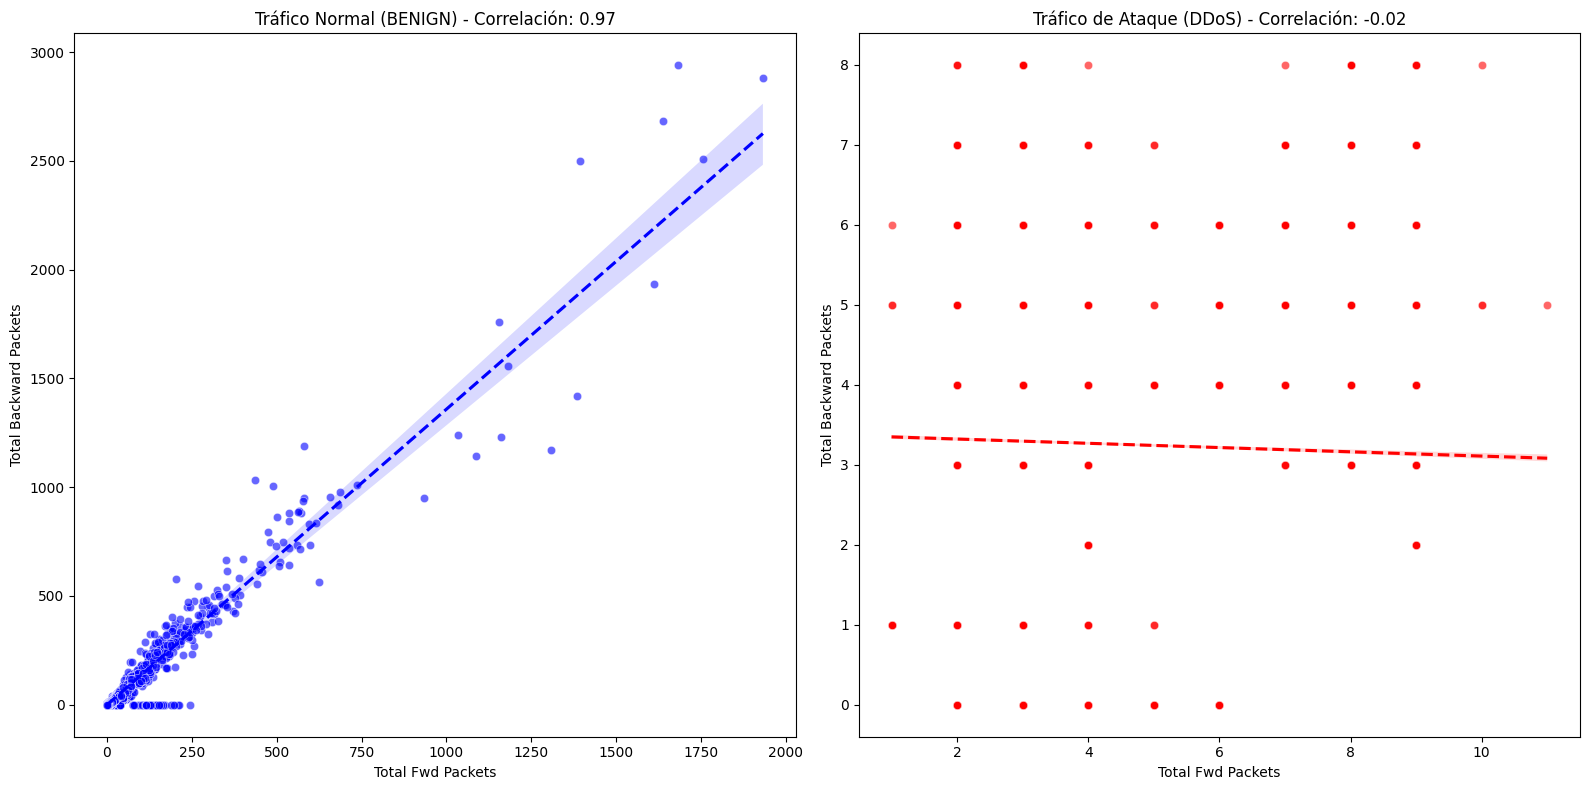

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos la figura
plt.figure(figsize=(16, 8))

# Filtramos los datos para el tráfico normal
data_normal = friday_limpio[friday_limpio['es_ataque'] == 0]
# Calculamos el coeficiente de correlación (Para el tráfico BENIGNO)
corr_normal = data_normal['Total Fwd Packets'].corr(data_normal['Total Backward Packets'])

# Scatter plot para el tráfico normal
plt.subplot(1, 2, 1)
sns.scatterplot(data=data_normal, 
                x='Total Fwd Packets', 
                y='Total Backward Packets', 
                color='blue', 
                alpha=0.6)
sns.regplot(data=data_normal, 
            x='Total Fwd Packets', 
            y='Total Backward Packets', 
            scatter=False, 
            color='blue', 
            line_kws={"linestyle":"--"})
plt.title(f'Tráfico Normal (BENIGN) - Correlación: {corr_normal:.2f}')
plt.xlabel('Total Fwd Packets')
plt.ylabel('Total Backward Packets')

# Filtramos los datos para tráfico de ataque (DDoS)
data_attack = friday_limpio[friday_limpio['es_ataque'] == 1]
# Calculamos el coeficiente de correlación (Para el tráfico DDoS)
corr_attack = data_attack['Total Fwd Packets'].corr(data_attack['Total Backward Packets'])

# Scatter plot para el tráfico de ataque
plt.subplot(1, 2, 2)
sns.scatterplot(data=data_attack, 
                x='Total Fwd Packets', 
                y='Total Backward Packets', 
                color='red', 
                alpha=0.6)
sns.regplot(data=data_attack, 
            x='Total Fwd Packets', 
            y='Total Backward Packets', 
            scatter=False, 
            color='red', 
            line_kws={"linestyle":"--"})
plt.title(f'Tráfico de Ataque (DDoS) - Correlación: {corr_attack:.2f}')
plt.xlabel('Total Fwd Packets')
plt.ylabel('Total Backward Packets')

plt.tight_layout()
plt.show()

Las expectativas del comportamiento son las siguientes que se pueden llegar a ver:

**Tráfico Normal (BENIGN)**:

* En el scatter plot para el tráfico benigno, se visualiza una dispersión más equilibrada, lo que indica que el tráfico normal tiene una relación más natural entre los paquetes enviados y recibidos.

**Tráfico de Ataque (DDoS)**:

* En el scatter plot para el tráfico de ataque, en cambio, se visualiza una concentración de puntos, lo que puede indicar que, aunque se envían muchos paquetes, no se reciben muchos a cambio, lo que es típico en ataques DDoS.

#### PASO 4: ANÁLISIS DE PATRONES ESPECÍFICOS

**Objetivo:** Identificamos patrones distintivos entre el tráfico normal y el anómalo.

**4.1 Scatterplots de características principales**





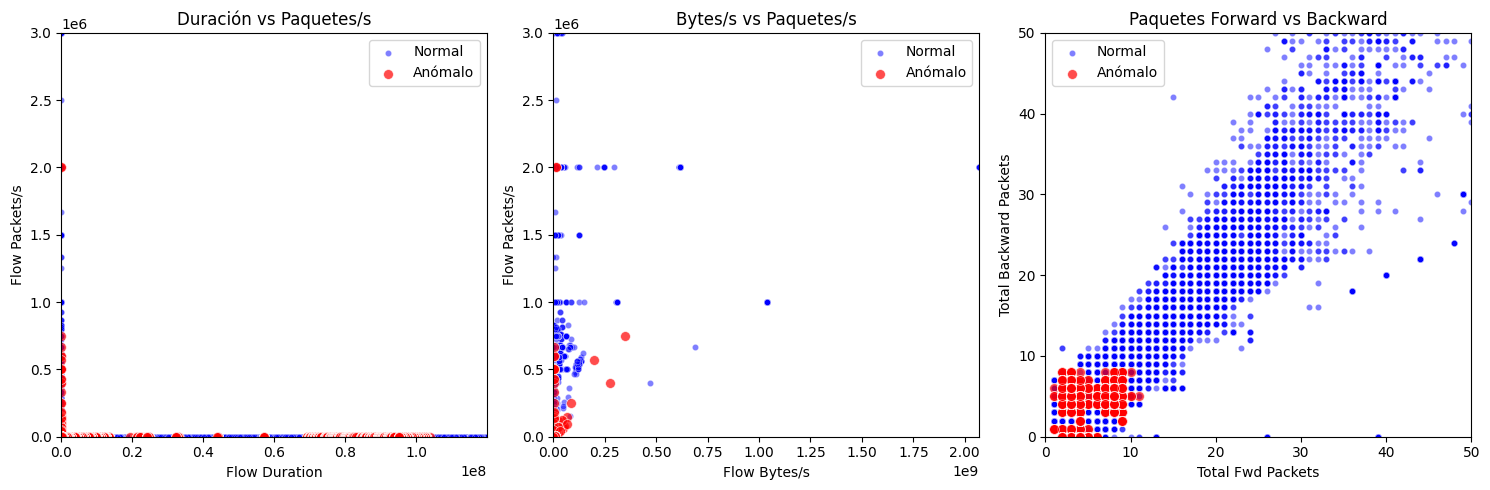

In [21]:
plt.figure(figsize=(15, 5))

# Scatter plot para 'Flow Duration' vs 'Flow Packets/s'
plt.subplot(1, 3, 1)
# Graficar tráfico normal
sns.scatterplot(data=friday_limpio[friday_limpio['es_ataque'] == 0], 
                x='Flow Duration', y='Flow Packets/s', 
                color='blue', alpha=0.5, s=20, label='Normal')  # Tráfico normal
# Graficar tráfico anómalo
sns.scatterplot(data=friday_limpio[friday_limpio['es_ataque'] == 1], 
                x='Flow Duration', y='Flow Packets/s', 
                color='red', alpha=0.7, s=50, label='Anómalo')  # Tráfico anómalo
plt.title('Duración vs Paquetes/s')
plt.xlim(0, friday_limpio['Flow Duration'].max())  # Ajustar límites del eje X
plt.ylim(0, friday_limpio['Flow Packets/s'].max())  # Ajustar límites del eje Y
plt.legend()

# Scatter plot para 'Flow Bytes/s' vs 'Flow Packets/s'
plt.subplot(1, 3, 2)
# Graficar tráfico normal
sns.scatterplot(data=friday_limpio[friday_limpio['es_ataque'] == 0], 
                x='Flow Bytes/s', y='Flow Packets/s', 
                color='blue', alpha=0.5, s=20, label='Normal')  # Tráfico normal
# Graficar tráfico anómalo
sns.scatterplot(data=friday_limpio[friday_limpio['es_ataque'] == 1], 
                x='Flow Bytes/s', y='Flow Packets/s', 
                color='red', alpha=0.7, s=50, label='Anómalo')  # Tráfico anómalo
plt.title('Bytes/s vs Paquetes/s')
plt.xlim(0, friday_limpio['Flow Bytes/s'].max())  # Ajustar límites del eje X
plt.ylim(0, friday_limpio['Flow Packets/s'].max())  # Ajustar límites del eje Y
plt.legend()

# Scatter plot para 'Total Fwd Packets' vs 'Total Backward Packets'
plt.subplot(1, 3, 3)
# Graficar tráfico normal
sns.scatterplot(data=friday_limpio[friday_limpio['es_ataque'] == 0], 
                x='Total Fwd Packets', y='Total Backward Packets', 
                color='blue', alpha=0.5, s=20, label='Normal')  # Tráfico normal
# Graficar tráfico anómalo
sns.scatterplot(data=friday_limpio[friday_limpio['es_ataque'] == 1], 
                x='Total Fwd Packets', y='Total Backward Packets', 
                color='red', alpha=0.7, s=50, label='Anómalo')  # Tráfico anómalo
plt.title('Paquetes Forward vs Backward')
plt.xlim(0, 50)  # Ajustar límites del eje X para ver más de cerca
plt.ylim(0, 50)  # Ajustar límites del eje Y para ver más de cerca
plt.legend()

plt.tight_layout()
plt.show()

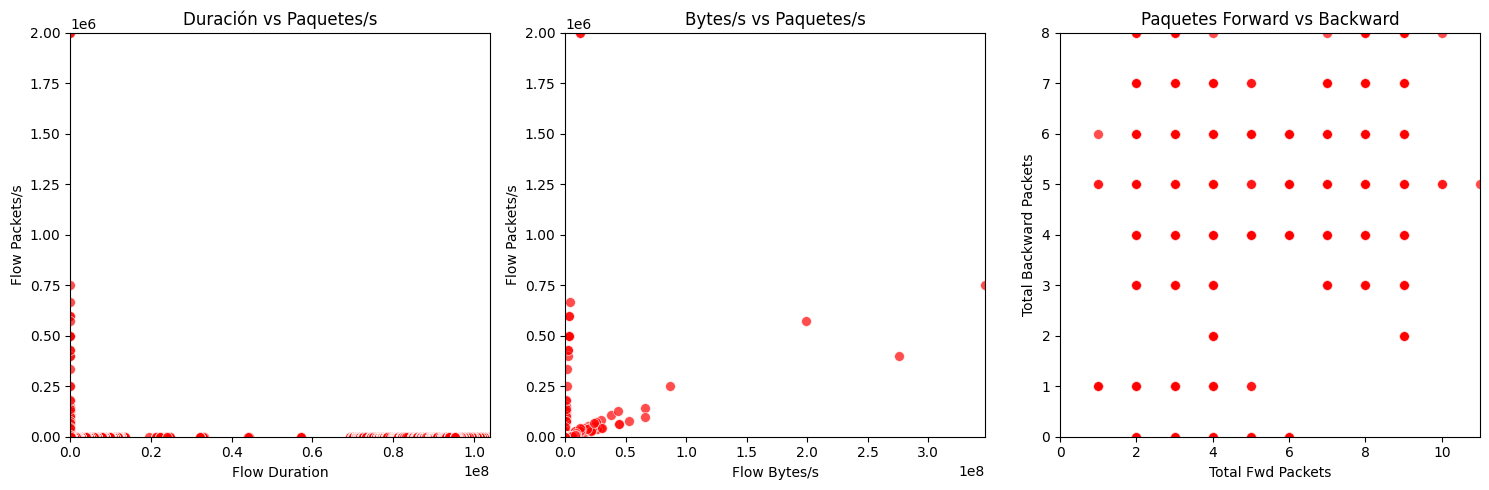

In [22]:
# Filtrar los datos de ataque
ataques = friday_limpio[friday_limpio['es_ataque'] == 1]

plt.figure(figsize=(15, 5))

# Scatter plot para 'Flow Duration' vs 'Flow Packets/s'
plt.subplot(1, 3, 1)
sns.scatterplot(data=ataques, x='Flow Duration', y='Flow Packets/s', 
                color='red', alpha=0.7, s=50)  # Solo tráfico de ataque
plt.title('Duración vs Paquetes/s')
plt.xlim(0, ataques['Flow Duration'].max())  # Ajustar límites del eje X
plt.ylim(0, ataques['Flow Packets/s'].max())  # Ajustar límites del eje Y

# Scatter plot para 'Flow Bytes/s' vs 'Flow Packets/s'
plt.subplot(1, 3, 2)
sns.scatterplot(data=ataques, x='Flow Bytes/s', y='Flow Packets/s', 
                color='red', alpha=0.7, s=50)  # Solo tráfico de ataque
plt.title('Bytes/s vs Paquetes/s')
plt.xlim(0, ataques['Flow Bytes/s'].max())  # Ajustar límites del eje X
plt.ylim(0, ataques['Flow Packets/s'].max())  # Ajustar límites del eje Y

# Scatter plot para 'Total Fwd Packets' vs 'Total Backward Packets'
plt.subplot(1, 3, 3)
sns.scatterplot(data=ataques, x='Total Fwd Packets', y='Total Backward Packets', 
                color='red', alpha=0.7, s=50)  # Solo tráfico de ataque
plt.title('Paquetes Forward vs Backward')
plt.xlim(0, ataques['Total Fwd Packets'].max())  # Ajustar límites del eje X
plt.ylim(0, ataques['Total Backward Packets'].max())  # Ajustar límites del eje Y

plt.tight_layout()
plt.show()

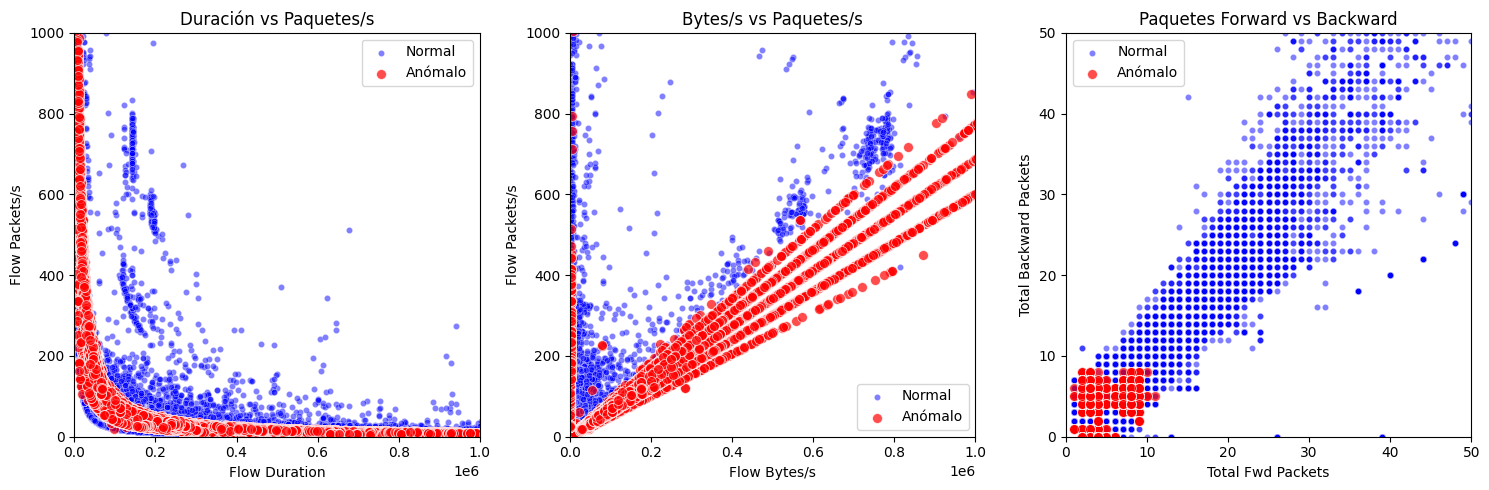

In [23]:
plt.figure(figsize=(15, 5))

# Scatter plot para 'Flow Duration' vs 'Flow Packets/s'
plt.subplot(1, 3, 1)
# Graficar tráfico normal
sns.scatterplot(data=friday_limpio[friday_limpio['es_ataque'] == 0], 
                x='Flow Duration', y='Flow Packets/s', 
                color='blue', alpha=0.5, s=20, label='Normal')  # Tráfico normal
# Graficar tráfico anómalo
sns.scatterplot(data=friday_limpio[friday_limpio['es_ataque'] == 1], 
                x='Flow Duration', y='Flow Packets/s', 
                color='red', alpha=0.7, s=50, label='Anómalo')  # Tráfico anómalo
plt.title('Duración vs Paquetes/s')
plt.xlim(0, 1e6)  # Ajustar límites del eje X para ver más de cerca
plt.ylim(0, 1e3)  # Ajustar límites del eje Y para ver más de cerca
plt.legend()

# Scatter plot para 'Flow Bytes/s' vs 'Flow Packets/s'
plt.subplot(1, 3, 2)
# Graficar tráfico normal
sns.scatterplot(data=friday_limpio[friday_limpio['es_ataque'] == 0], 
                x='Flow Bytes/s', y='Flow Packets/s', 
                color='blue', alpha=0.5, s=20, label='Normal')  # Tráfico normal
# Graficar tráfico anómalo
sns.scatterplot(data=friday_limpio[friday_limpio['es_ataque'] == 1], 
                x='Flow Bytes/s', y='Flow Packets/s', 
                color='red', alpha=0.7, s=50, label='Anómalo')  # Tráfico anómalo
plt.title('Bytes/s vs Paquetes/s')
plt.xlim(0, 1e6)  # Ajustar límites del eje X para ver más de cerca
plt.ylim(0, 1e3)  # Ajustar límites del eje Y para ver más de cerca
plt.legend()

# Scatter plot para 'Total Fwd Packets' vs 'Total Backward Packets'
plt.subplot(1, 3, 3)
# Graficar tráfico normal
sns.scatterplot(data=friday_limpio[friday_limpio['es_ataque'] == 0], 
                x='Total Fwd Packets', y='Total Backward Packets', 
                color='blue', alpha=0.5, s=20, label='Normal')  # Tráfico normal
# Graficar tráfico anómalo
sns.scatterplot(data=friday_limpio[friday_limpio['es_ataque'] == 1], 
                x='Total Fwd Packets', y='Total Backward Packets', 
                color='red', alpha=0.7, s=50, label='Anómalo')  # Tráfico anómalo
plt.title('Paquetes Forward vs Backward')
plt.xlim(0, 50)  # Ajustar límites del eje X para ver más de cerca
plt.ylim(0, 50)  # Ajustar límites del eje Y para ver más de cerca
plt.legend()

plt.tight_layout()
plt.show()

- En el scatterplot de "Duración vs Paquetes/s", se puede observar una dispersión más uniforme en el tráfico normal teniendo una mayor variabilidad en la duración y en los paquetes por segundo. Se podría decir, que presenta un comportamiento más natural. En cambio, para el tráfico anómalo, se podría decir que presenta un patrón muchisimo más agrupado además de una menor duración.

- En la gráfica de Bytes/s vs Paquetes/s, se puede observar para el tráfico normal, una relación muchísimo más dispersa de lo normal, habiendo una mayor variablidad en la relación de bytes/paquetes. En cambio, para el tráfico anómalo, presenta una relación lineal muy definida con cierto patrón constante.

- En el scatterplot de "Paquetes Forward vs Backward", se puede observar para el tráfico normal, un balance entre los paquetes enviados y recibidos. Hay una dispersión mucho más natural pudiendo ser una comunicación bidireccional normal. En cambio, para el tráfico anómalo, se podría decir por ejemplo que hay cierto desbalance en la dirección de los paquetes. 




#### PASO 5: CONCLUSIONES ESTADÍSTICAS


**Objetivo:** Validar estadísticamente las diferencias observadas


**5.1 Realizamos las pruebas estadísticas para cada característica principal**





Aquí lo que hacemos, es determinar si hay diferencias significativas entre los grupos.

- Si el p-value es menor que 0.05, entonces hay diferencias significativas entre los grupos y por tanto la característica es útil para distinguir ataques.

- Si el p-value es mayor que 0.05, entonces no hay diferencias significativas entre los grupos y por tanto la característica no es útil para distinguir ataques.


In [24]:
print("\nPRUEBAS ESTADÍSTICAS")
print("-" * 50)
for caracteristica in caracteristicas_principales:
    stat, p_value = stats.mannwhitneyu(
        friday_limpio[friday_limpio['es_ataque'] == 0][caracteristica],
        friday_limpio[friday_limpio['es_ataque'] == 1][caracteristica],
        alternative='two-sided'
    )
    print(f"\nCaracterística: {caracteristica}")
    print(f"p-value: {p_value:.10f}")


PRUEBAS ESTADÍSTICAS
--------------------------------------------------

Característica: Flow Duration
p-value: 0.0000000000

Característica: Flow Packets/s
p-value: 0.0000000000

Característica: Flow Bytes/s
p-value: 0.0000000000

Característica: Total Fwd Packets
p-value: 0.0000000000

Característica: Total Backward Packets
p-value: 0.0000000000


Esto quiere decir, por ejemplo, que en el caso del Flow Duration, como el p-valor es igual a 0.0 -  Podemos usar esta característica para distinguir ataques.

Tras realizar un análisis detallado de los datos de tráfico de red, podemos confirmar nuestra hipótesis principal: *"El tráfico de red etiquetado como ataque presenta patrones y características significativamente distintas al tráfico benigno, lo que permite su identificación mediante el análisis de variables clave".*

Este estudio ha revelado diferencias entre el tráfico normal y los ataques DDoS. El tráfico normal muestra un comportamiento más orgánico y variable, con una distribución natural de paquetes y relaciones equilibradas entre las diferentes métricas analizadas. En el caso contrario, el tráfico de ataque refleja patrones mecánicos y repetitivos, con una distribución más concentrada de paquetes y correlaciones más fuertes y predecibles.

Las características clave como lo han sido *"Flow Duration"*, *"Flow Packets/s"*, *"Flow Bytes/s"* y el *"total de paquetes tanto forward como backward"*, han demostrado ser especialmente significativas para la diferenciación entre el tráfico normal y el de ataque.

El **análisis de correlaciones** ha sido particularmente de gran ayuda. En el tráfico normal, las relaciones entre variables nos han mostrado patrones más naturales y variables, típicos de interacciones humanas reales. Por el contrario, los ataques DDoS presentan correlaciones mucho más fuertes y patrones más definidos, indicativos de comportamiento automatizado.

En resumen, los hechos recopilados a través de este análisis proporcionan una base sólida para confirmar nuestra hipótesis principal y sugiere caminos claros para la implementación de sistemas efectivos de detección de ataques en redes.

Siendo las características clave: **"Flow Duration"**, **"Flow Packets/s"**, **"Flow Bytes/s"** y el **"Total de paquetes tanto forward como backward"**.

________________________________________________________________________________________________________________________________________________________

#### Relación de Flow Duration VS Correlación (entre Total Fwd Packets y Total Backward Packets) (Sugerencia de Hegoi) **APLICACIÓN**

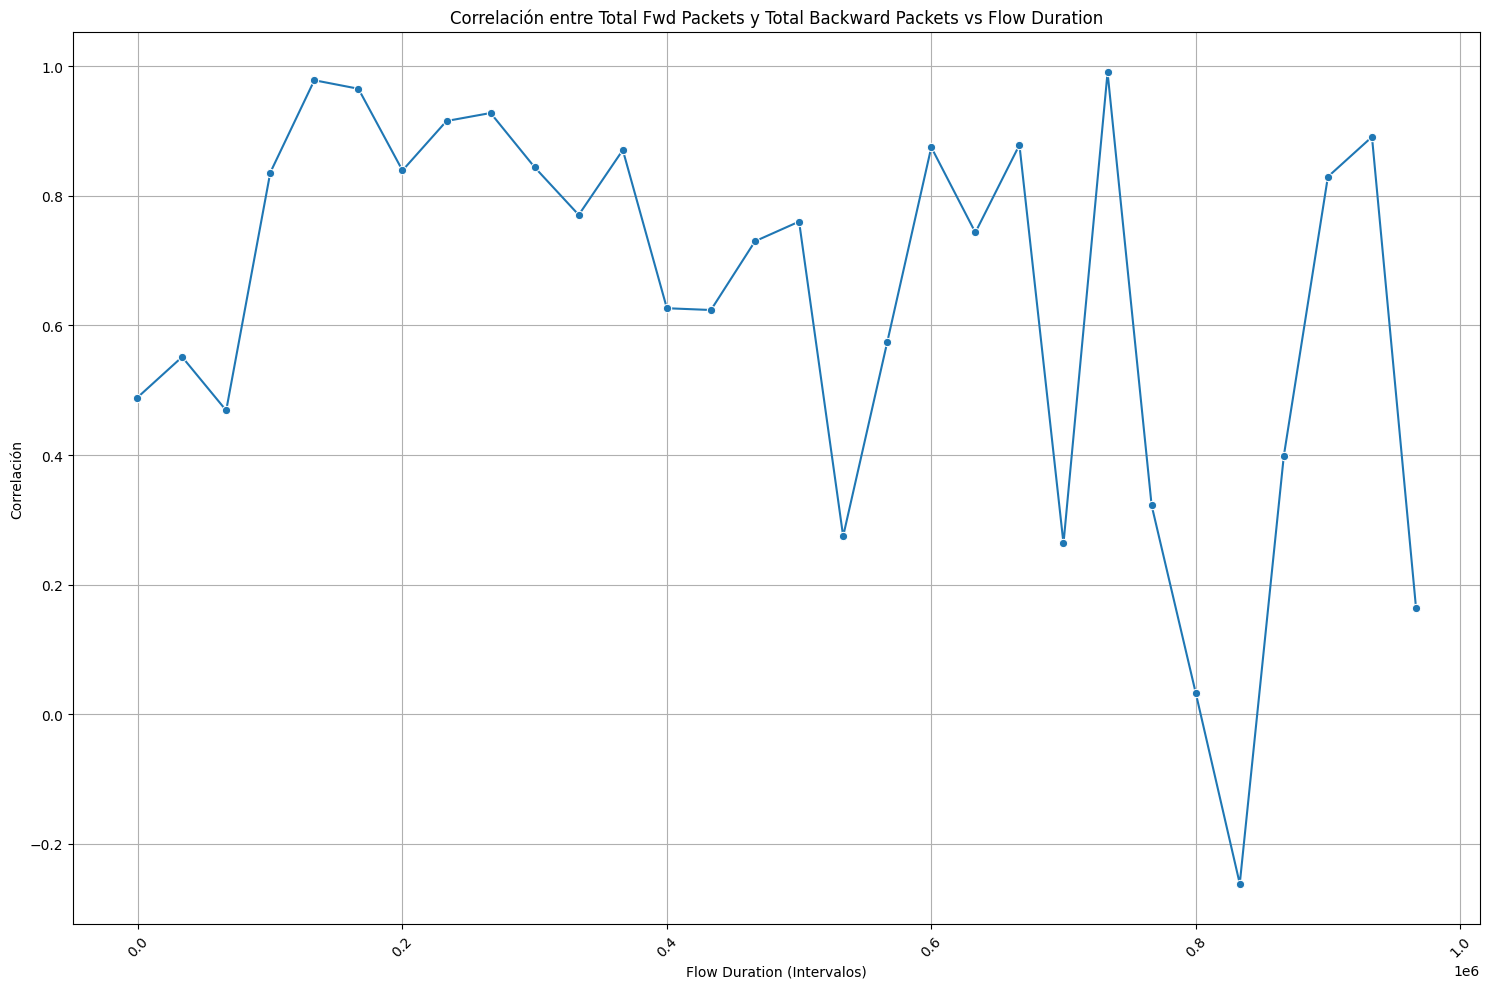

In [26]:
# Filtramos los datos para obtener solo los periodos cortos de tiempo
umbral_duracion = 1e6  # Ajusta este valor según tus datos
datos_cortos = friday_limpio[friday_limpio['Flow Duration'] < umbral_duracion]

# Creamos un DataFrame para almacenar las correlaciones
correlaciones = []

# Definimos intervalos de Flow Duration
intervalos = pd.cut(datos_cortos['Flow Duration'], bins=30)

# Calculamos la correlación para cada intervalo
for intervalo in intervalos.unique():
    subset = datos_cortos[intervalos == intervalo]
    if len(subset) > 1:  # Asegurarse de que hay suficientes datos
        correlacion = subset['Total Fwd Packets'].corr(subset['Total Backward Packets'])
        correlaciones.append({'Flow Duration Interval': intervalo, 'Correlación': correlacion})

# Convertimos a DataFrame
correlaciones_df = pd.DataFrame(correlaciones)

# Extraemos los límites de los intervalos para el eje X
correlaciones_df['Intervalo Inferior'] = correlaciones_df['Flow Duration Interval'].apply(lambda x: x.left)
correlaciones_df['Intervalo Superior'] = correlaciones_df['Flow Duration Interval'].apply(lambda x: x.right)

# Graficamos
plt.figure(figsize=(15, 10))
sns.lineplot(data=correlaciones_df, x='Intervalo Inferior', y='Correlación', marker='o')
plt.title('Correlación entre Total Fwd Packets y Total Backward Packets vs Flow Duration')
plt.xlabel('Flow Duration (Intervalos)')
plt.ylabel('Correlación')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### Explicación del código (Gráfica):

**Ejes de gráfica**:

* El eje x es el (Flow Duration): Este eje representa los intervalos del flujo de datos (Para un periodo corto de tiempo). Cada punto en el eje x corresponde a un intervalo de duración del flujo.

* El eje y (correlación): En este eje se muestra el valor de la correlación entre Total Fwd Packets y Total Backward Packets para cada intervalo de Flow Duration. La correlación es un valor entre dos o más variables que varía entre -1 y 1.

**Línea de la gráfica**:

* La línea conecta los puntos que representan la correlación calculada para cada intervalo de Flow Duration. Cada punto en la línea corresponde a la correlación entre los paquetes enviados y recibidos en ese intervalo específico de tiempo.







**Intuición que saco de la gráfica**:

* Si la línea se mantiene cerca de 1 en la mayoría de los intervalos, indica que hay una relación fuerte y positiva entre Total Fwd Packets y Total Backward Packets en esos intervalos de Flow Duration. Se puede decir, que este caso es típico de un tráfico normal. (Es equilibrado)

* Si la línea cae significativamente por debajo de 1 o se acerca a 0 en ciertos intervalos, esto puede ser un indicio de anomalías. En esos intervalos de Flow Duration, hay un aumento en los paquetes enviados pero a su vez no se presenta un aumento en los paquetes recibidos.

En si, la gráfica nos proporciona una visualización clara de como la correlación entre los paquetes enviados y recibidos varía con la duración del flujo. Al analizar esta relación, se pueden detectar patrones normales y anómalos en el tráfico de red.

Procederemos a continuación, separar para cada tráfico:

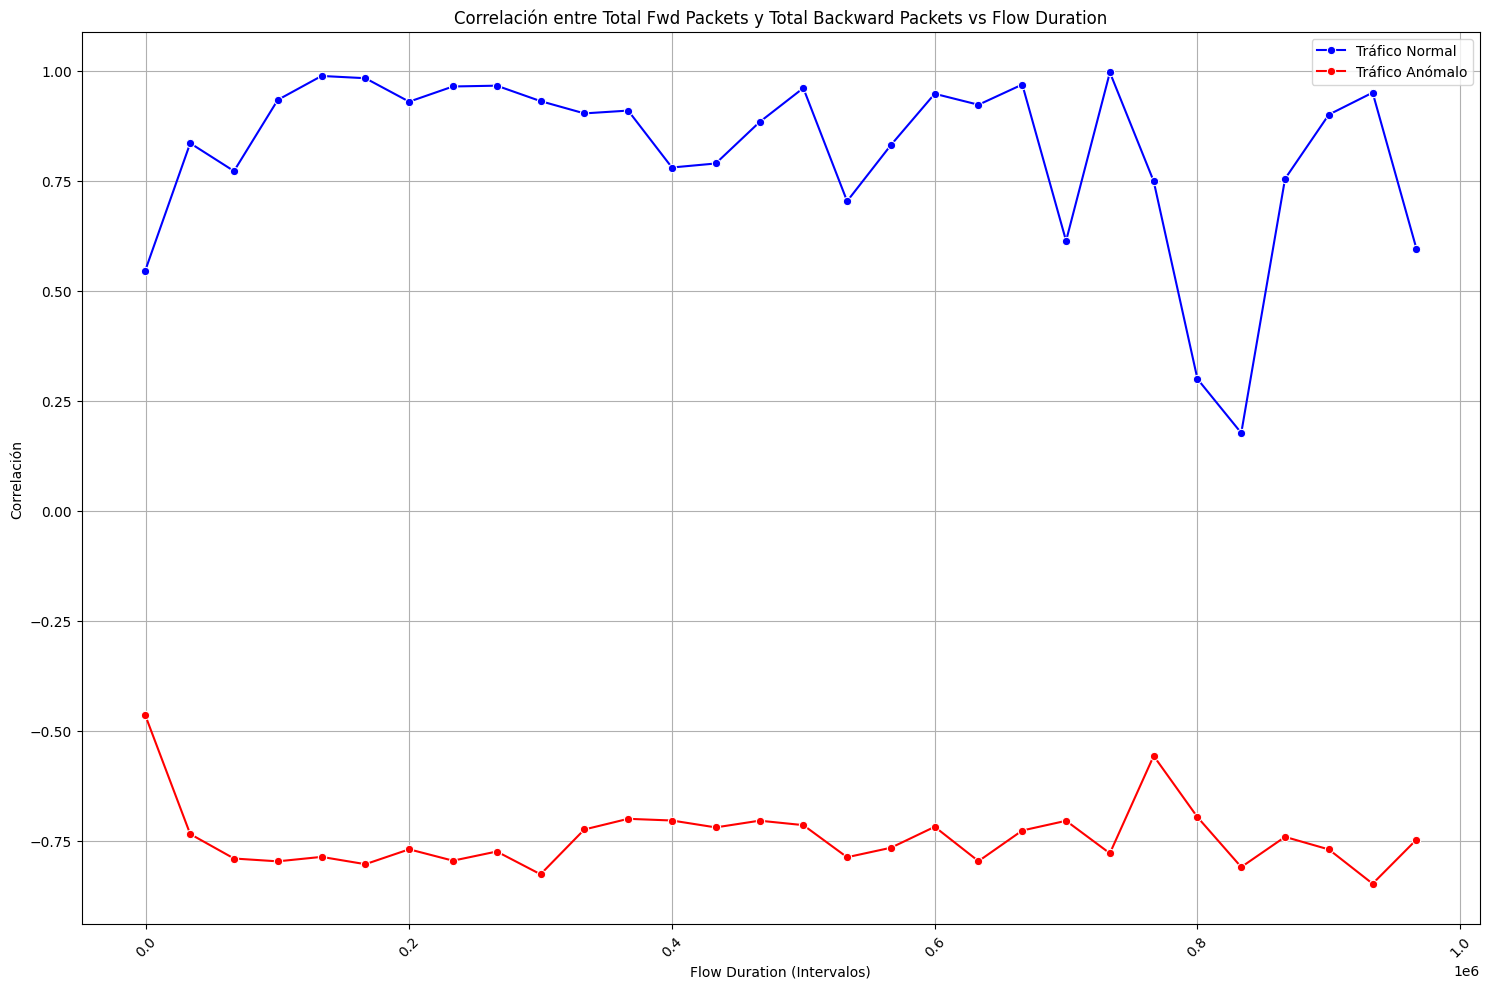

In [29]:
# Filtramos los datos para obtener solo los periodos cortos de tiempo
umbral_duracion = 1e6  # Ajusta este valor según tus datos
datos_cortos = friday_limpio[friday_limpio['Flow Duration'] < umbral_duracion]

# Creamos listas para almacenar las correlaciones
correlaciones_normales = []
correlaciones_anomalo = []

# Definimos los intervalos de Flow Duration
intervalos = pd.cut(datos_cortos['Flow Duration'], bins=30)

# Calculamos la correlación para cada intervalo
for intervalo in intervalos.unique():
    # Subconjunto para tráfico normal
    subset_normal = datos_cortos[(intervalos == intervalo) & (datos_cortos['es_ataque'] == 0)]
    if len(subset_normal) > 1:  # Asegurarse de que hay suficientes datos
        correlacion_normal = subset_normal['Total Fwd Packets'].corr(subset_normal['Total Backward Packets'])
        correlaciones_normales.append({'Flow Duration Interval': intervalo, 'Correlación': correlacion_normal})
    
    # Subconjunto para tráfico anómalo
    subset_anomalo = datos_cortos[(intervalos == intervalo) & (datos_cortos['es_ataque'] == 1)]
    if len(subset_anomalo) > 1:  # Asegurarse de que hay suficientes datos
        correlacion_anomalo = subset_anomalo['Total Fwd Packets'].corr(subset_anomalo['Total Backward Packets'])
        correlaciones_anomalo.append({'Flow Duration Interval': intervalo, 'Correlación': correlacion_anomalo})

# Convertimos a DataFrame
correlaciones_normales_df = pd.DataFrame(correlaciones_normales)
correlaciones_anomalo_df = pd.DataFrame(correlaciones_anomalo)

# Extraemos los límites de los intervalos para el eje X
correlaciones_normales_df['Intervalo Inferior'] = correlaciones_normales_df['Flow Duration Interval'].apply(lambda x: x.left)
correlaciones_anomalo_df['Intervalo Inferior'] = correlaciones_anomalo_df['Flow Duration Interval'].apply(lambda x: x.left)

# Graficamos ambas correlaciones
plt.figure(figsize=(15, 10))
sns.lineplot(data=correlaciones_normales_df, x='Intervalo Inferior', y='Correlación', marker='o', label='Tráfico Normal', color='blue')
sns.lineplot(data=correlaciones_anomalo_df, x='Intervalo Inferior', y='Correlación', marker='o', label='Tráfico Anómalo', color='red')
plt.title('Correlación entre Total Fwd Packets y Total Backward Packets vs Flow Duration')
plt.xlabel('Flow Duration (Intervalos)')
plt.ylabel('Correlación')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

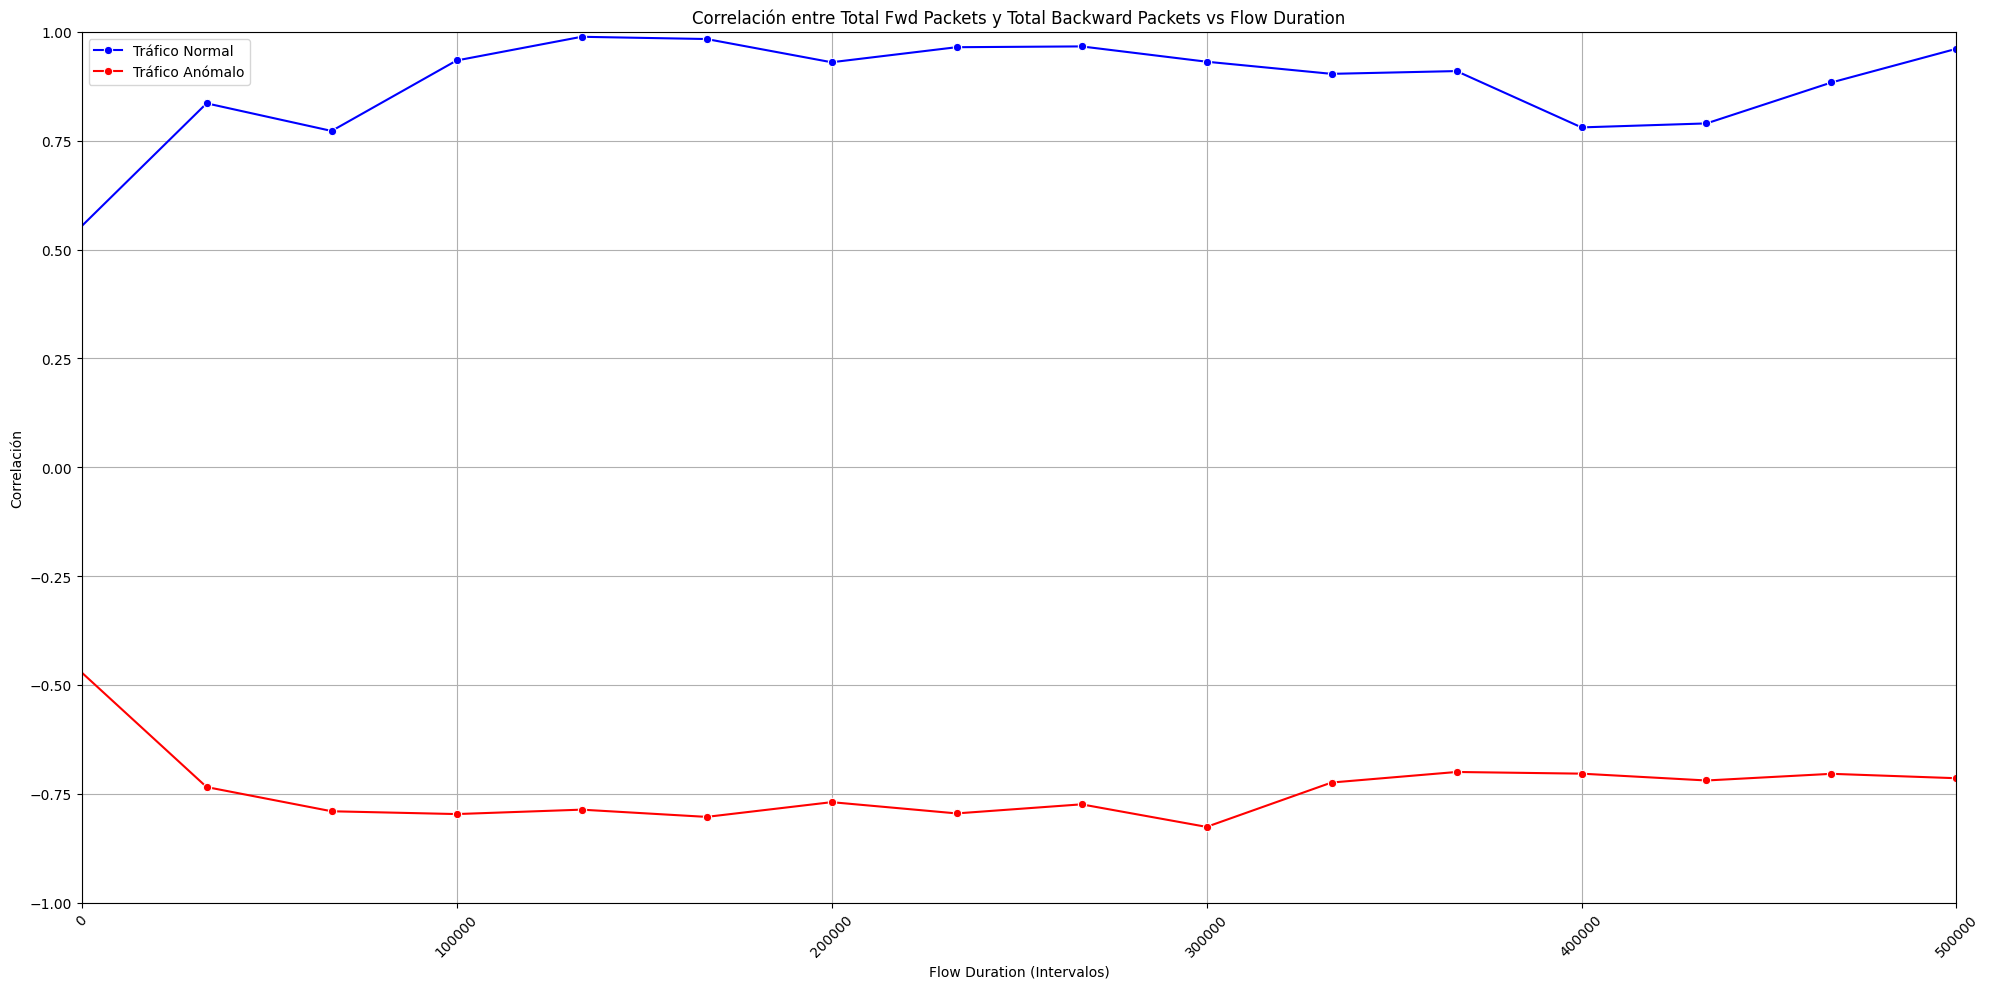

In [33]:
# Filtramos los datos para obtener solo los periodos cortos de tiempo
umbral_duracion = 1e6  # Ajusta este valor según tus datos
datos_cortos = friday_limpio[friday_limpio['Flow Duration'] < umbral_duracion]

# Creamos listas para almacenar las correlaciones
correlaciones_normales = []
correlaciones_anomalo = []

# Definimos intervalos de Flow Duration
intervalos = pd.cut(datos_cortos['Flow Duration'], bins=30)

# Calculamos la correlación para cada intervalo
for intervalo in intervalos.unique():
    # Subconjunto para tráfico normal
    subset_normal = datos_cortos[(intervalos == intervalo) & (datos_cortos['es_ataque'] == 0)]
    if len(subset_normal) > 1:  # Asegurarse de que hay suficientes datos
        correlacion_normal = subset_normal['Total Fwd Packets'].corr(subset_normal['Total Backward Packets'])
        correlaciones_normales.append({'Flow Duration Interval': intervalo, 'Correlación': correlacion_normal})
    
    # Subconjunto para tráfico anómalo
    subset_anomalo = datos_cortos[(intervalos == intervalo) & (datos_cortos['es_ataque'] == 1)]
    if len(subset_anomalo) > 1:  # Asegurarse de que hay suficientes datos
        correlacion_anomalo = subset_anomalo['Total Fwd Packets'].corr(subset_anomalo['Total Backward Packets'])
        correlaciones_anomalo.append({'Flow Duration Interval': intervalo, 'Correlación': correlacion_anomalo})

# Convertimos a DataFrame
correlaciones_normales_df = pd.DataFrame(correlaciones_normales)
correlaciones_anomalo_df = pd.DataFrame(correlaciones_anomalo)

# Extraemos los límites de los intervalos para el eje X
correlaciones_normales_df['Intervalo Inferior'] = correlaciones_normales_df['Flow Duration Interval'].apply(lambda x: x.left)
correlaciones_anomalo_df['Intervalo Inferior'] = correlaciones_anomalo_df['Flow Duration Interval'].apply(lambda x: x.left)

# Graficamos ambas correlaciones
plt.figure(figsize=(20, 10))  # Aumentar el tamaño de la figura
sns.lineplot(data=correlaciones_normales_df, x='Intervalo Inferior', y='Correlación', marker='o', label='Tráfico Normal', color='blue')
sns.lineplot(data=correlaciones_anomalo_df, x='Intervalo Inferior', y='Correlación', marker='o', label='Tráfico Anómalo', color='red')
plt.title('Correlación entre Total Fwd Packets y Total Backward Packets vs Flow Duration')
plt.xlabel('Flow Duration (Intervalos)')
plt.ylabel('Correlación')
plt.xticks(rotation=45)

# Ajustamos los límites de los ejes para ver más de cerca la parte izquierda
plt.xlim(0, 5e5)  # Ajusta el límite del eje X para enfocarte en la parte izquierda
plt.ylim(-1, 1)   # Mantener el rango de correlación esperado

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()